#Customer Segmentation End-to-end Project

In addition to segmenting customers with machine learning algorithms, we will also answer some business questions:

1.   How graphically do sales change over time? What is the maximum sales peak? When did this peak sales peak occur?
2.   Which month does the highest sales volume occur?
3.   What are the other standards for higher sales volume, such as which product line sells the most?
4. What are the companies or customers that sell the most?
5. Is it possible to segment customers? If yes, what are the patterns of these customer groups?


## 1 - Initial Requirements

Always at the beginning of a project we must import some elementary libraries.

In [23]:
import numpy as np
import pandas as pd

#images
import seaborn as sns
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
sns.set_theme()

## 2 - Get the Data

In [24]:
CustomerDataset = pd.read_csv('/content/sales_data_sample.csv',encoding='unicode_escape')

## 3 - Initial Data Insights

After all the initial setup, we are ready to go to work and extract some precious information from our data. First, we use the head() method on the dataframe to better understand the dataset. This dataset was extracted from the website 'https://www.kaggle.com/datasets/kyanyoga/sample-sales-data'.

In [25]:
CustomerDataset.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


### 3.1 Small Glossary

As many of the features are self-explanatory, we will only cover a few here:


*   STATUS - order armadillos whether it was shipped or not;
*   QTR_ID - It's the Quarters of the Year;
*   MSRP - Manufacturer's suggested retail price;
*   DEALSIZE - If there will be many products or few that are purchased.
*   SALES = QUANTITYORDERED	* PRICEEACH (the value of each product above 100 has been rounded)



### 3.2 - Dataset Summary

After understanding some attributes, we can get a description of the data with the info() method.

In [26]:
CustomerDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


With this, we understand that our dataset has 16 categorical and 9 numeric attributes, totaling 24 columns with 2822 rows.

### 3.3 - Understanding the data

Now that we know what our numeric attributes are, we can plot them in the form of a histogram. Let's plot various information on the x-axis by the frequency density on the y-axis.

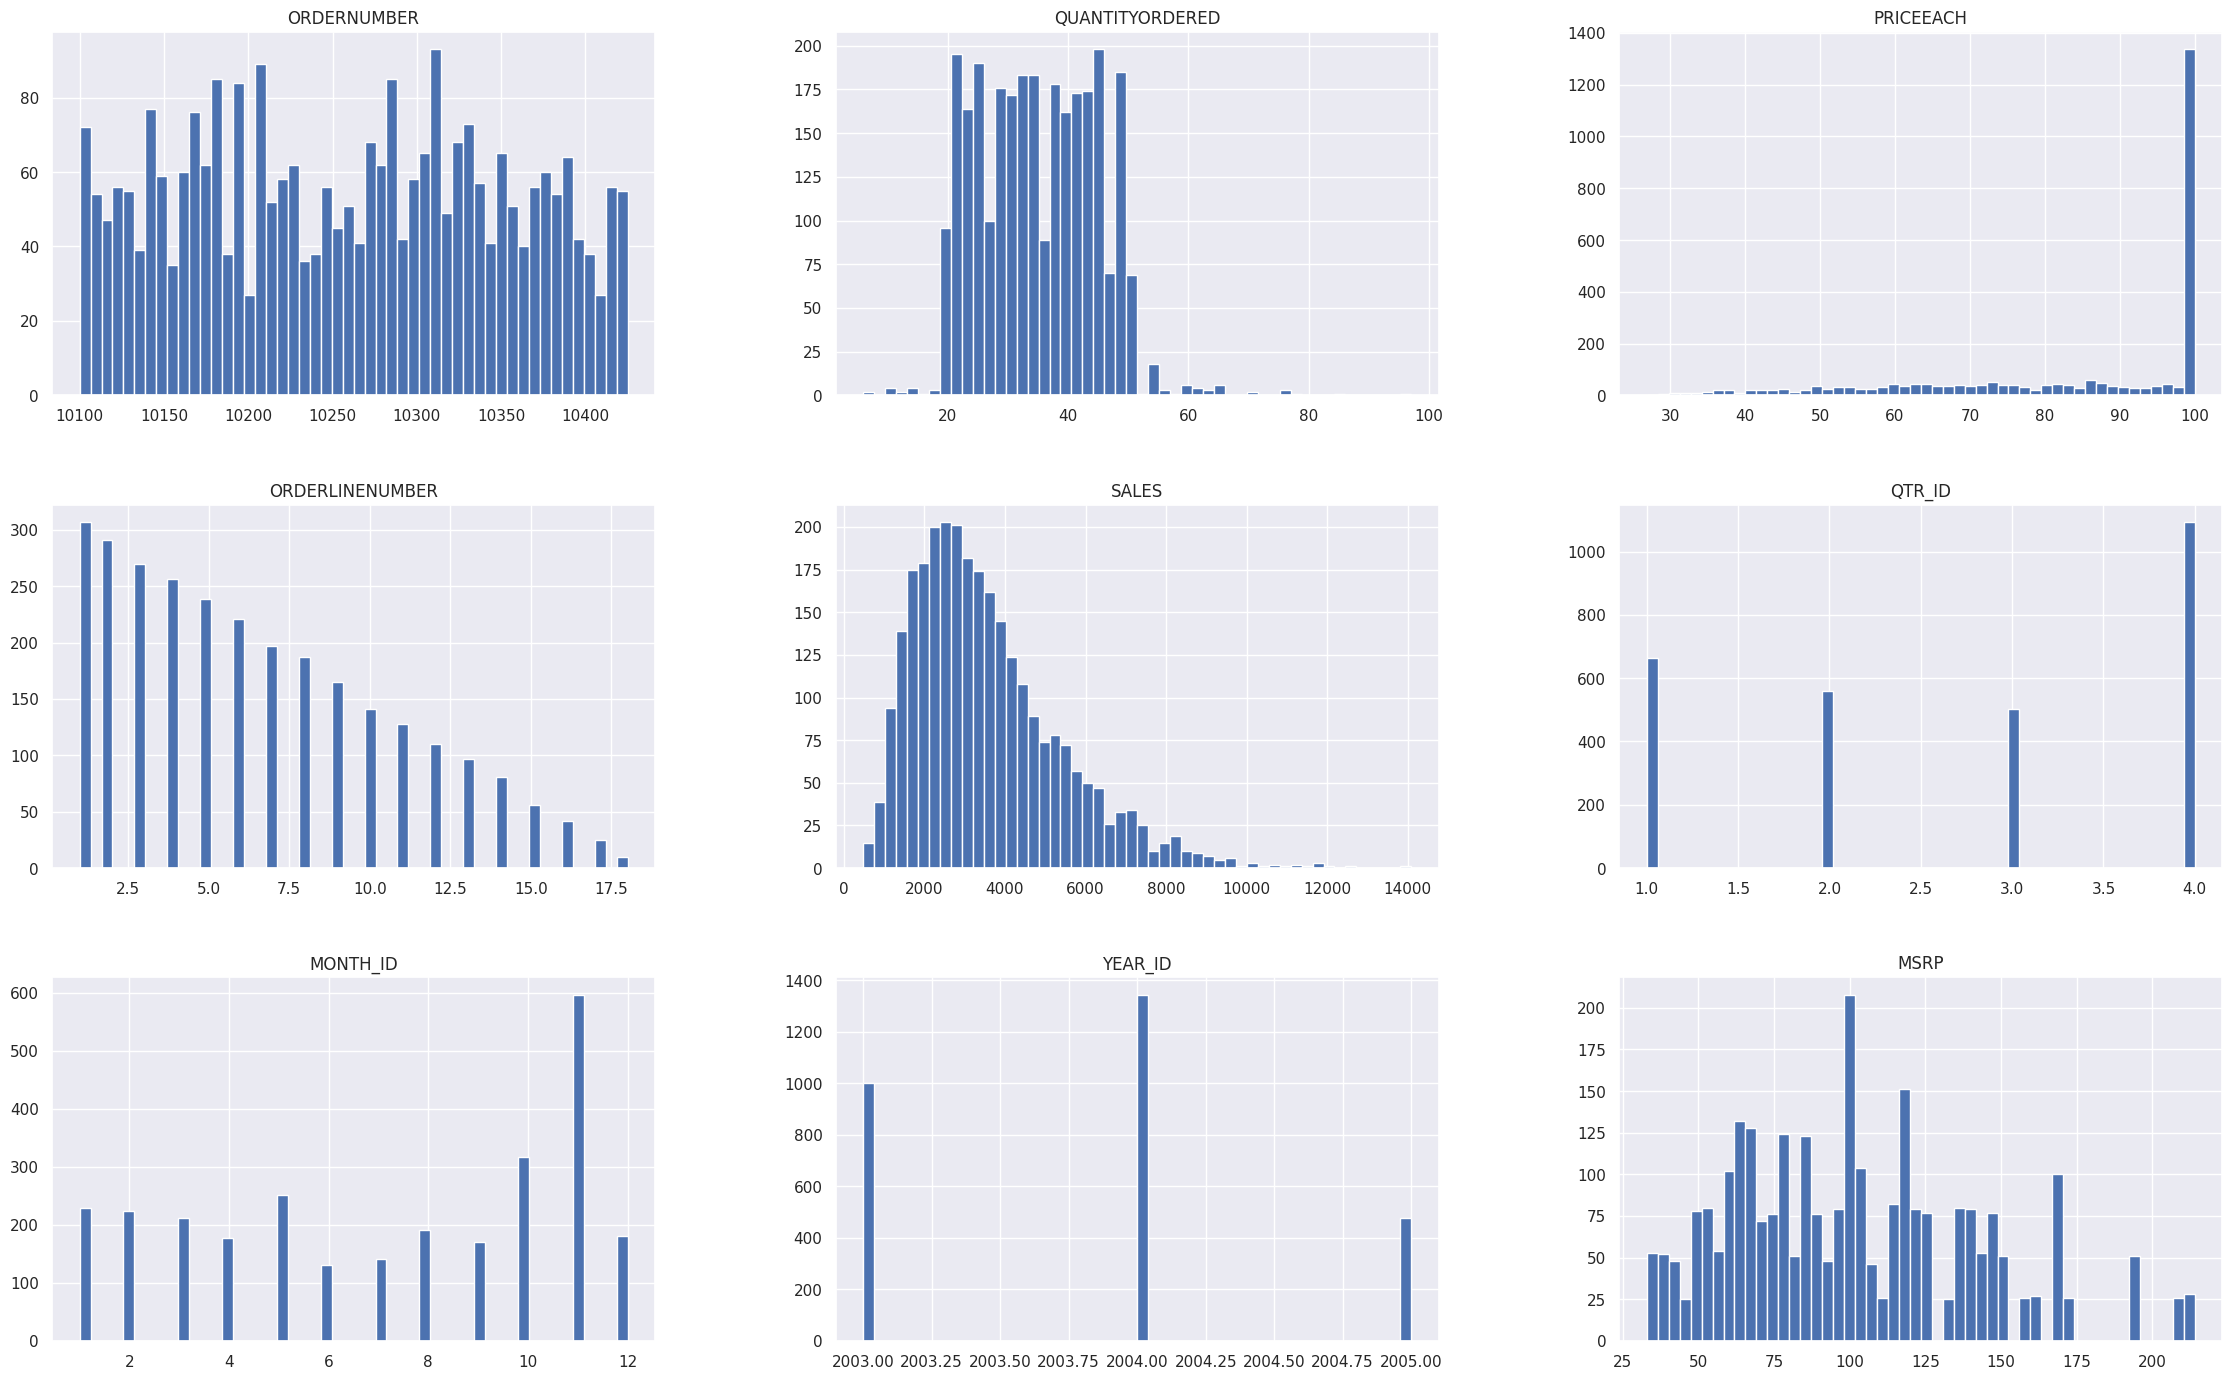

In [27]:
CustomerDataset.hist(bins=50, figsize=(28,17))
plt.show()

some of this data doesn't seem to make sense like the ORDERLINENUMBER, however we can take some advantages of other attributes, as is the case of the QUANTITY ORDERED which tells us the highest frequency of the number of orders almost reaches 200. The price of each order has a long tail as well as the month attribute, later we will treat such data in order to remedy these **long tails**. We also noticed that the sales graph is very similar to a Gaussian and this is very good, because the data seems to be well distributed, in addition, we have that the frequency peak occurs when we have approximately 200 occurrences of 3500 sales, and we perceive a similarity of such an attribute with the peak of the Manufacturer's Suggested Retail Price (MSRP) attribute that is to be expected.

To understand the data in an easier way, we will use the describe() method:

In [28]:
CustomerDataset.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


What stands out in this description is the high value of the standard deviation of sales, which indicates that the sales values are far from the average. The 'Price of each' attribute, on the other hand, has an average a little far from the maximum value (100) which has an impressive frequency of 1300 occurrences.

In addition to numerical data, in our data we have many that are categorical, to know more information about such attributes we will use the value_counts() method.

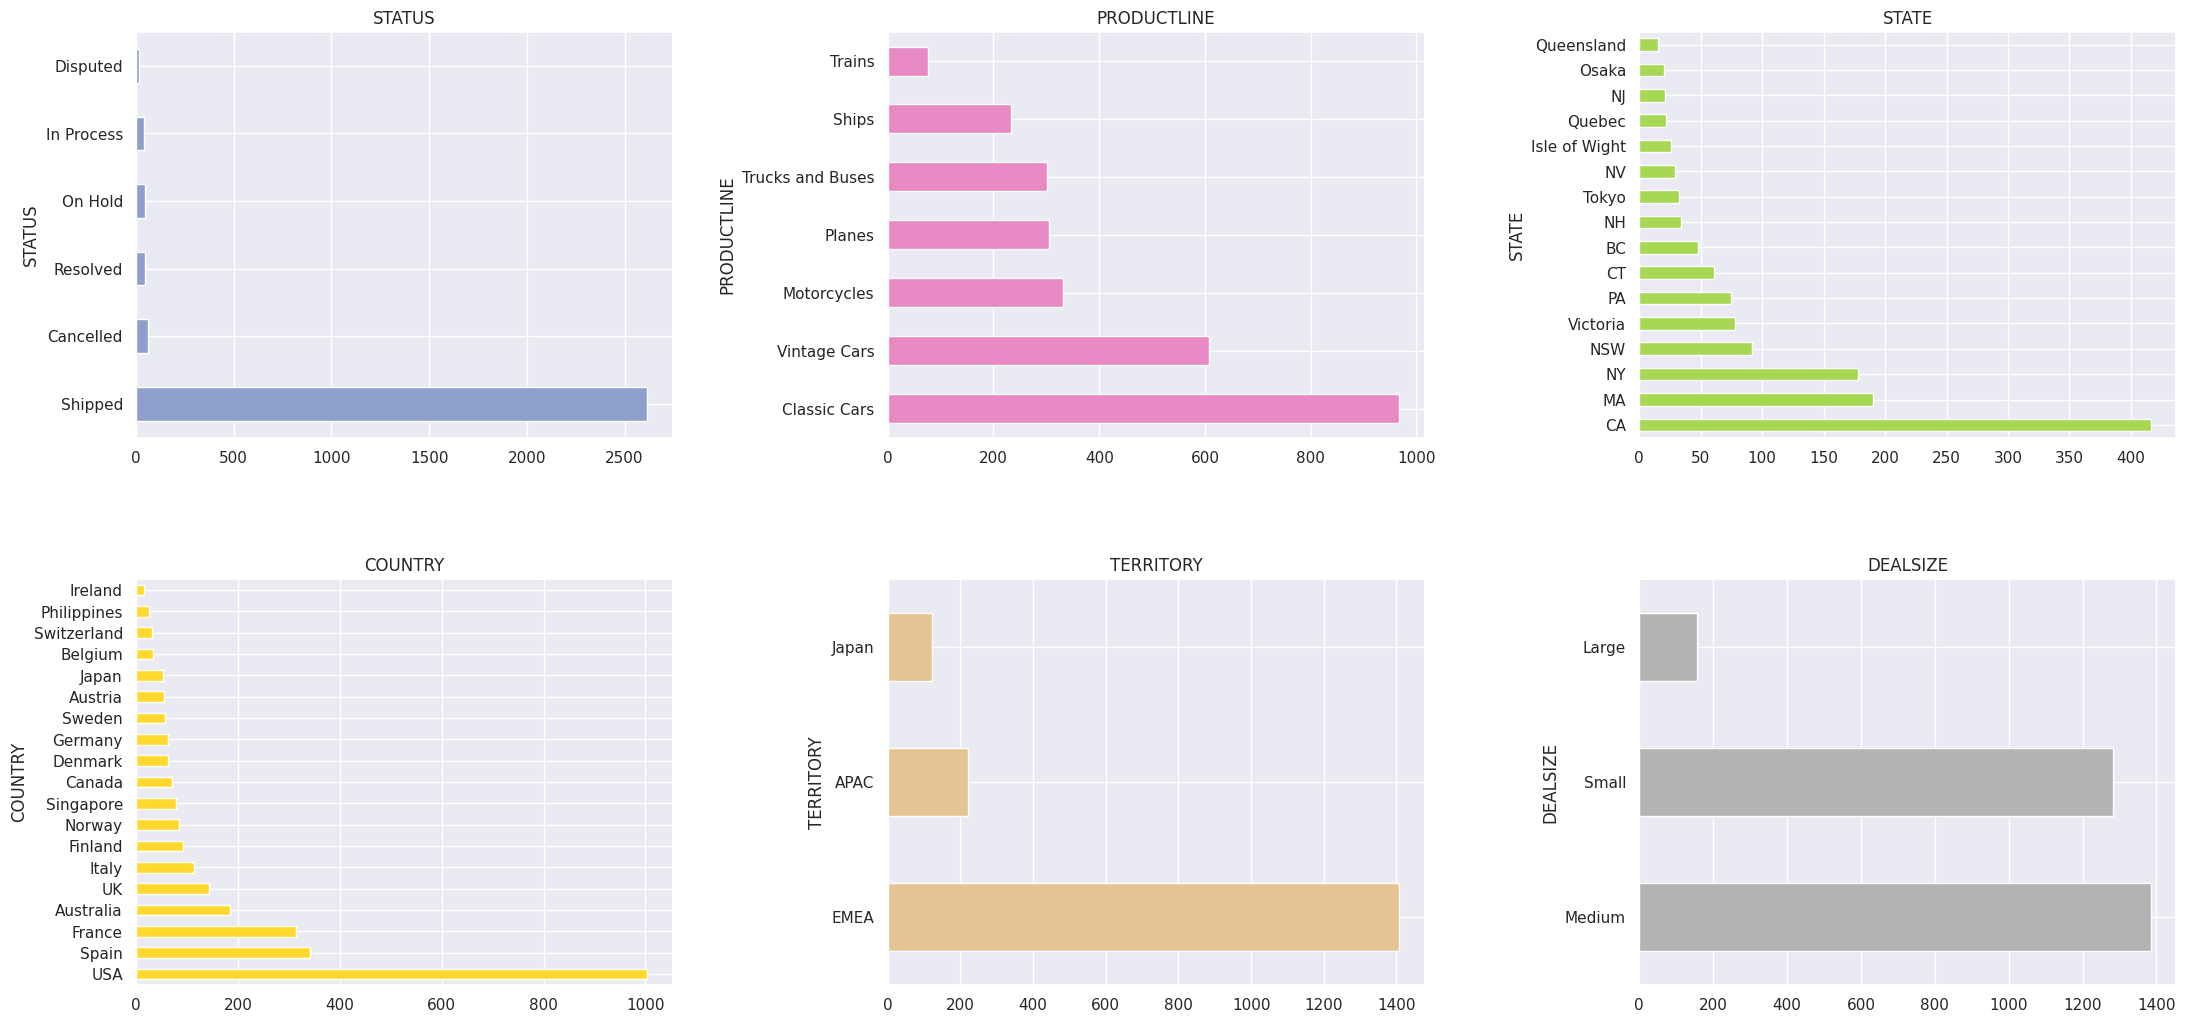

In [29]:
#so as not to spoil our original data
DataCopy = CustomerDataset.copy()

#we select the categorical attributes and pull out some data that is almost impossible to plot
DatasetAux = DataCopy.select_dtypes(include=['object']).drop(['ORDERDATE','PRODUCTCODE','CUSTOMERNAME','PHONE'
                                                        ,'ADDRESSLINE1','ADDRESSLINE2','POSTALCODE','CONTACTLASTNAME'
                                                        ,'CONTACTFIRSTNAME','CITY','ADDRESSLINE1'],axis=1)

#we create a list with the plottable categorical attributes
catList = DatasetAux.columns.to_list()


#chosen color map
cmap1 = mpl.cm.Set2

fig=plt.figure(figsize=(16,12))

#loop that plots all the data we want using the value_counts() method
for i, col in enumerate(catList):
  ax=fig.add_subplot(3,3,i+1)
  plt.xlabel('Number of Occurrences')
  plt.ylabel('Categories')
  valuec = DataCopy[col].value_counts().plot(kind='barh',title=col,color=cmap1(i + 2),grid=True,ax=ax)
  plt.subplots_adjust(left=0.125,
                    bottom=0.1,
                    right=1.4,
                    top=1.35,
                    wspace=0.4,
                    hspace=0.35)
plt.show()


Based on these results, we were able to understand the highest and lowest occurrences of the categories for each attribute illustrated above. It is worth noting that EMEA stands for (Europe, Middle East and Africa) and APAC stands for Asia-Pacific which includes much of East Asia, South Asia, Southeast Asia and Oceania.

## 4 - Visualizing data and Answering Some Business Questions




After gaining insights from our data, it's time to answer the business questions before moving on to the machine learning model. The first question we're going to ask is, how does the sales in our dataset change over time? What is the maximum sales peak? On what date did this maximum peak occur?

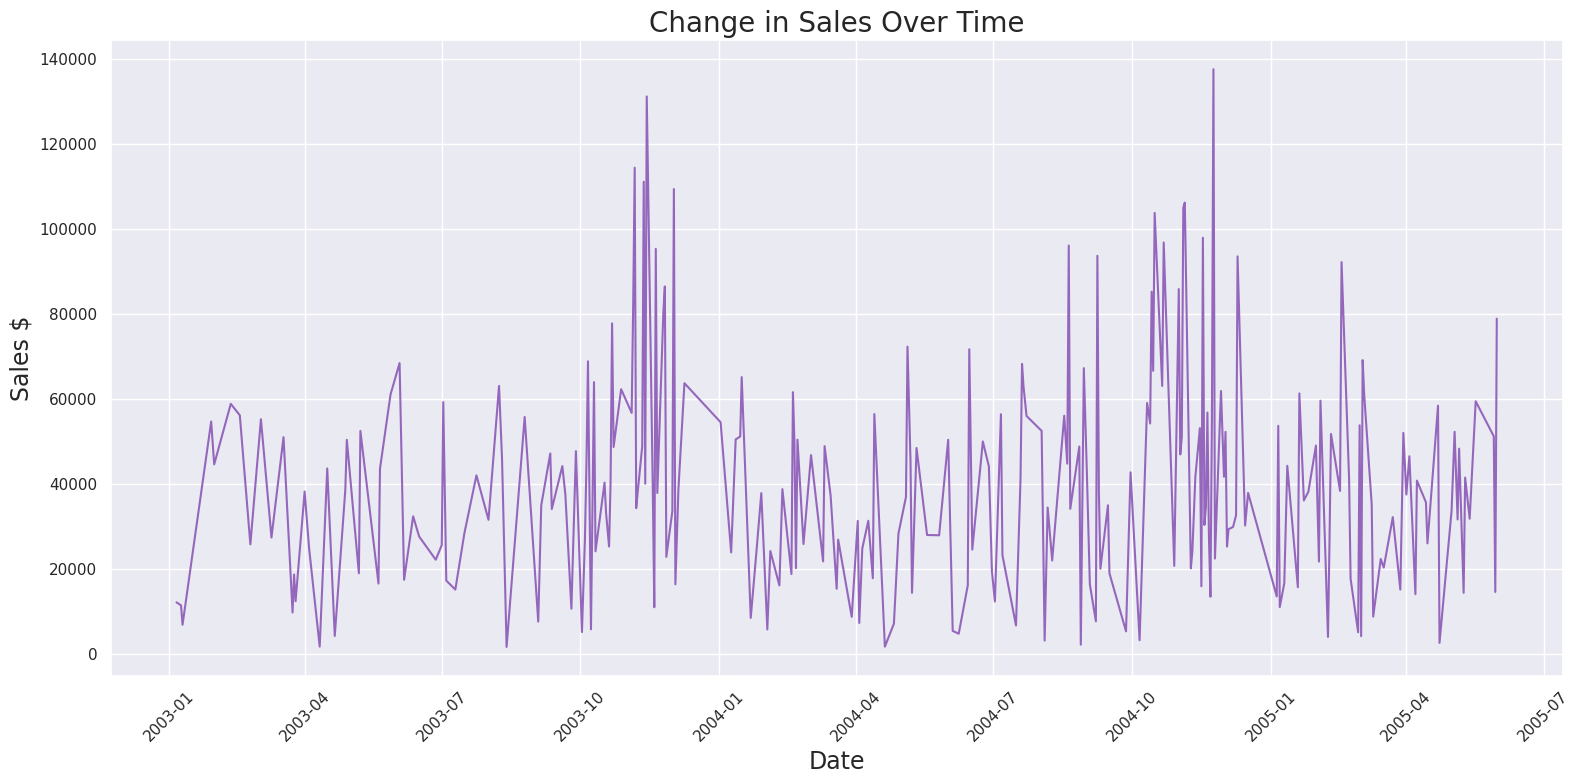

In [30]:
#Convert order date to datetime format
DataCopy['ORDERDATE'] = pd.to_datetime(DataCopy['ORDERDATE'])

#we group together orders that were placed on the same date
DtGroup = DataCopy.groupby('ORDERDATE').sum()

#plotting
fig=plt.figure(figsize=(16,8))

plt.title('Change in Sales Over Time',fontsize = 20)
plt.xlabel('Date',fontsize=17)
plt.ylabel('Sales $',fontsize=17)
plt.xticks(rotation=45)
plt.plot(DtGroup.index,DtGroup.SALES,color='tab:purple')
fig.tight_layout()
plt.show()

By this graph we understand how sales alternate with time, in addition we also note the maximum sales peak which is approximately 140000 at the end of the year 2004.

If we want to know in our data what the sales pattern is, such as which month sells the most, we should again use groupby('variable').sum() method, to group data of the same class and add this data to discover several things in our data.

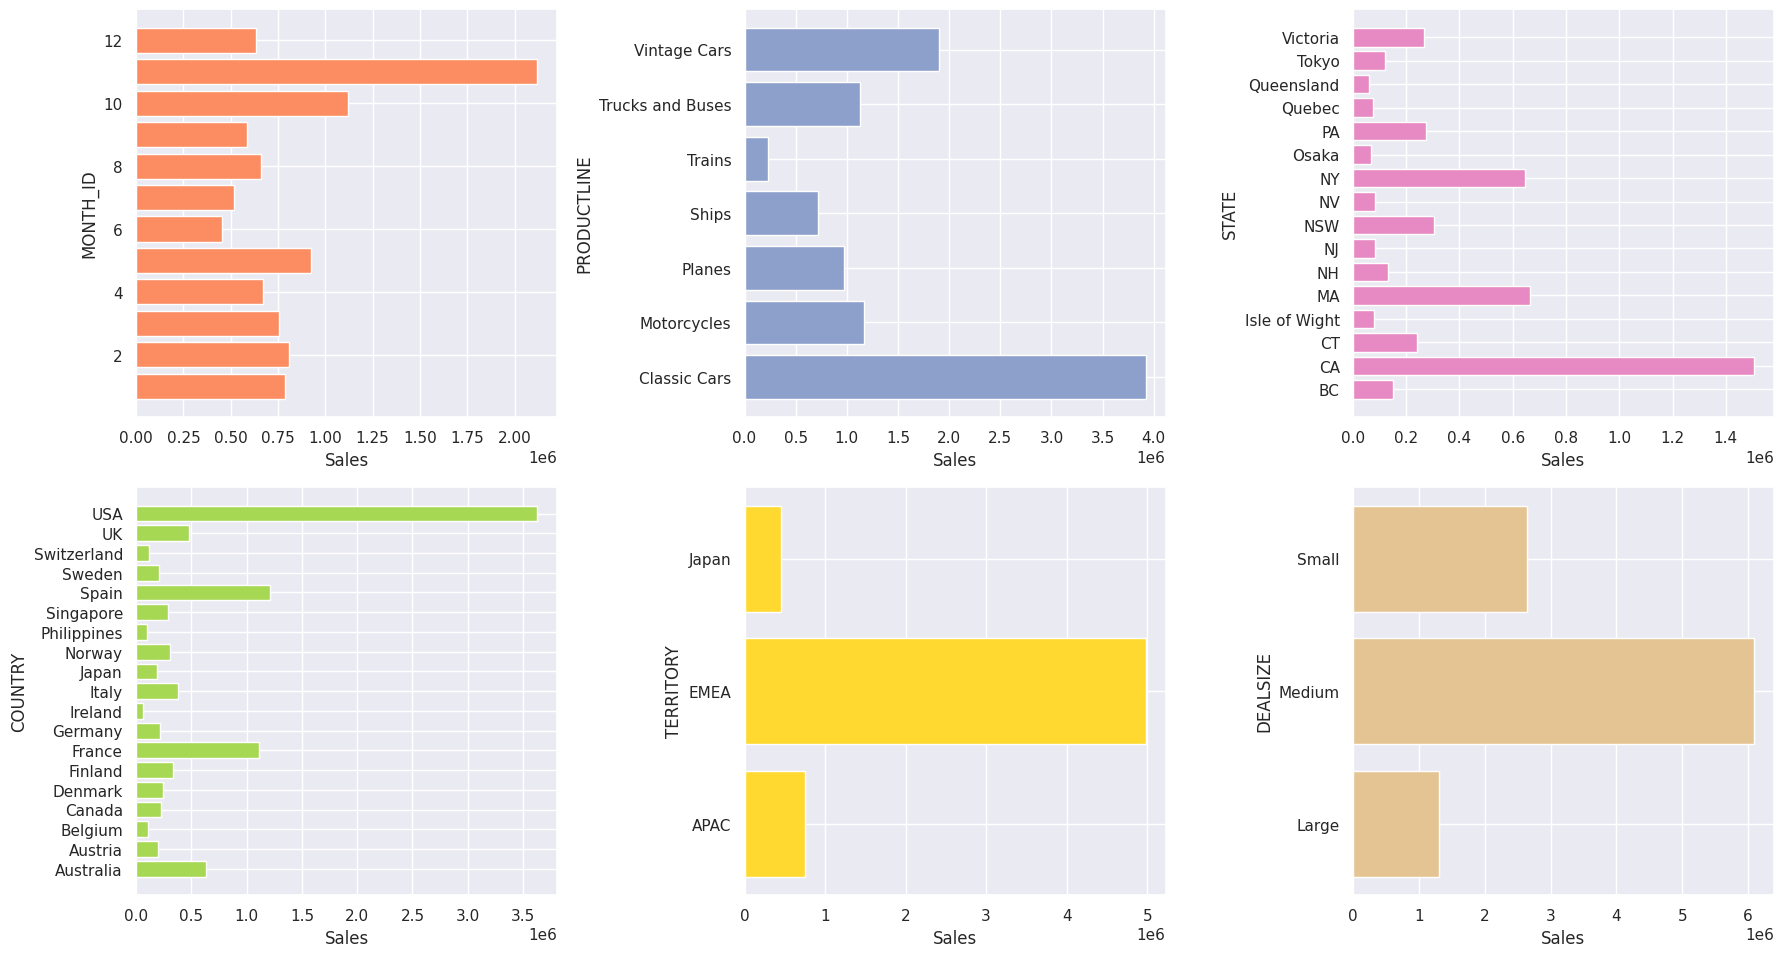

In [31]:
#labels that will be inserted on the y-axis
labels1 = [mounth for mounth, DataCopy in DataCopy.groupby('MONTH_ID')]

labels2 = [pl for pl, DataCopy in DataCopy.groupby('PRODUCTLINE')]

labels3 = [st for st, DataCopy in DataCopy.groupby('STATE')]

labels4 = [ct for ct, DataCopy in DataCopy.groupby('COUNTRY')]

labels5 = [tr for tr, DataCopy in DataCopy.groupby('TERRITORY')]

labels6 = [da for da, DataCopy in DataCopy.groupby('DEALSIZE')]



#dictionary containing the labels to plot
player_dict = {'l1':labels1,'l2':labels2,'l3':labels3, 'l4': labels4, 'l5':labels5, 'l6':labels6}

#the list that we are going to go through to find the best ponctuate for each category
resultsList = ['MONTH_ID', 'PRODUCTLINE', 'STATE','COUNTRY', 'TERRITORY', 'DEALSIZE']

fig=plt.figure(figsize=(18,14))


for val,i in zip(enumerate(player_dict.values()),resultsList):
  #use the groupby('age_cut').sum() methods to group the tracks for example and sum the data of their group
  # Select only the 'SALES' column before summing
  results = DataCopy.groupby(i)['SALES'].sum()
  ax=fig.add_subplot(3,3,val[0]+1)
  #we plot the vertical bar
  ax.barh(val[1],results,color=cmap1(val[0] + 1)) # Assuming cmap1 is defined elsewhere
  ax.set_ylabel(i)
  ax.set_xlabel('Sales')
fig.tight_layout()
plt.show()

Such results indicate that the month, product line, state, country, Territory, business size that are most profitable are respectively:

November, classic cars, CA(California), USA, EMEA (Europe, Middle East and Africa), Medium.

If we finally want to know who exactly are the customers who sell the most (or whoever gave the data was vague in this information) we have to plot the quantity ordered by sales and we will highlight the name of the customers.


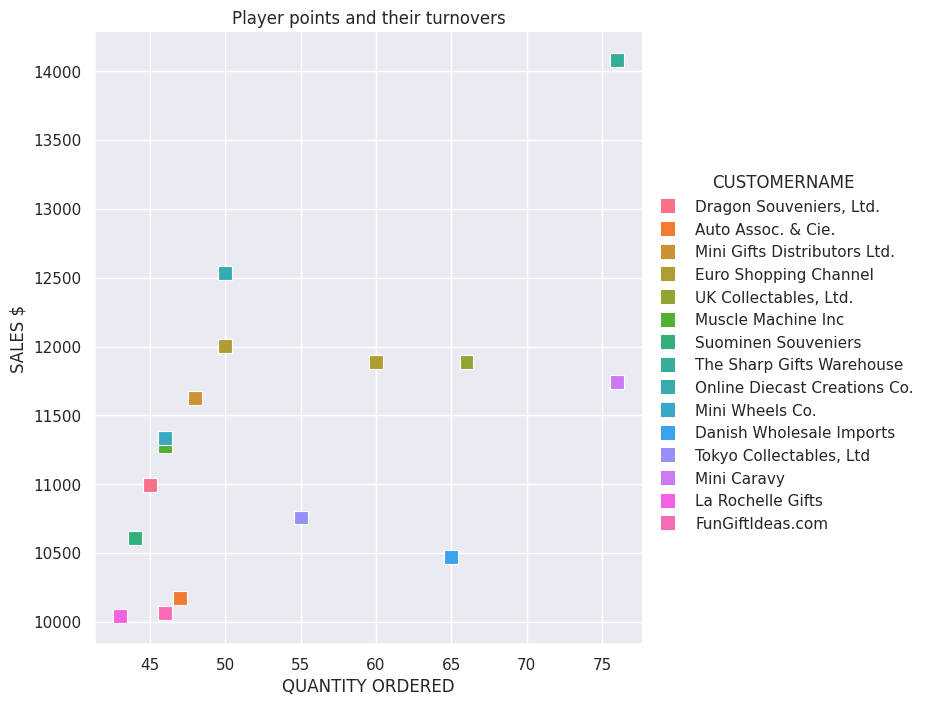

In [32]:
#we create smaller data to get only the best sales.
morefewerdata = DataCopy[(DataCopy['QUANTITYORDERED'] > 40) & (DataCopy['SALES'] > 10000)].copy()

#plotting
graph = sns.relplot(x=morefewerdata['QUANTITYORDERED'],y=morefewerdata['SALES'],height = 7,hue=morefewerdata['CUSTOMERNAME'],s=100,marker=r's')
graph.set(title="Player points and their turnovers")
graph.set_ylabels("SALES $", clear_inner=False)
graph.set_xlabels("QUANTITY ORDERED", clear_inner=False)

By this graphic we understand that the client or company that bought the most was The Sharp Gifts Warehouse.

## 5 - Exploratory Data Analysis and Feature Engineering

I would like to create new data and perform an outlier removal, however, some of our attributes were already initially created from the combination of others, besides that I will not perform the outlier removal, because in our histogram we have some long tails and if we do the removal of outliers would just be killing a large portion of information. Initially, we will make a copy of our data.

In [33]:
Dataset = CustomerDataset.copy()

DatasetNum = Dataset.select_dtypes(include=[np.number])#only the numerical data for later

### 5.1 Search for Correlations

Now one of the most important parts of the project has arrived, because we are going to try to understand how the attributes of our dataset are related, for this we will use the correlation coefficient through the corr() method.

In [34]:
import pandas as pd
import numpy as np

# Assuming 'Dataset' is your original DataFrame
Matrix_corr = Dataset.select_dtypes(include=[np.number]).corr()  # Select only numeric columns
Matrix_corr['SALES'].sort_values(ascending=False)  # Proceed with correlation analysis

,SALES
SALES,1.000000
PRICEEACH,0.657841
MSRP,0.635239
QUANTITYORDERED,0.551426
ORDERNUMBER,0.039919
YEAR_ID,0.035647
QTR_ID,-0.006796
MONTH_ID,-0.009605
ORDERLINENUMBER,-0.058400


The correlation coefficient close to 1 reveals a positive relationship between the data, if the correlation coefficient is close to -1 it expresses a negative relationship. For example, the PRICE EACH attribute tends to increase as sales increase and vice versa.

Furthermore, we can look at these relationships in the form of a heat map.

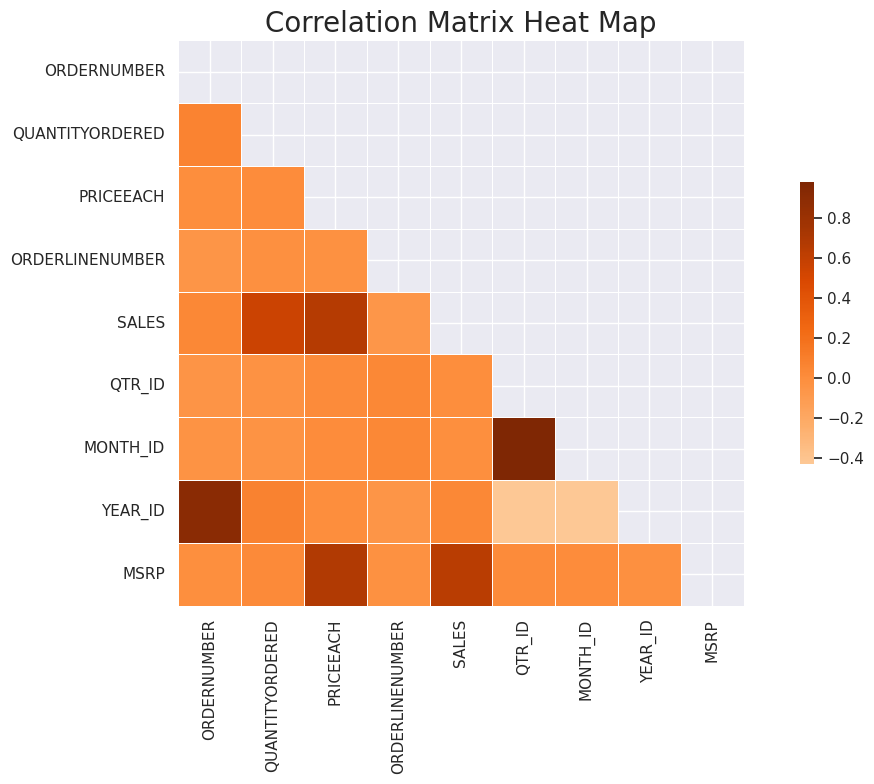

In [35]:
#we avoid a repetition of the correlation map with mask
mask = np.triu(np.ones_like(Matrix_corr))

f=plt.figure(figsize=(12,8))

#we create the heat map
graph = sns.heatmap(Matrix_corr,mask=mask,cmap=plt.get_cmap("Oranges"),center=0,square=True,linewidths=.5,cbar_kws={"shrink": .5})
graph.set_title("Correlation Matrix Heat Map",fontsize = 20)
sns.set(font_scale = 1)
f.tight_layout()

and we notice the same correlations we saw before, with a few more.

### 5.2 Prepare the Data

First we will return to our dataset unchanged, then we will delete some columns that are undesirable.

In [36]:
Dataset = CustomerDataset.copy()


to_drop  = ['ADDRESSLINE1', 'ADDRESSLINE2', 'POSTALCODE', 'CITY', 'TERRITORY',
            'PHONE', 'STATE', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME', 'CUSTOMERNAME',
            'ORDERNUMBER', "ORDERDATE","QTR_ID","ORDERLINENUMBER","YEAR_ID","PRODUCTCODE"]

Dataset = Dataset.drop(to_drop, axis = 1)

### 5.3 - Transformations by Pipelines (Cleaning, scaling, etc...)

As our data has many imperfections we must remedy them by employing a pepilines transformation, which sequentially applies various estimates and transformations to the data through the fit_transform() method. In our pipeline:

1. First, we fill in the missing data in the dataset, with the column's median through the SimpleImputer(strategy='median') method;
2. We apply the PowerTransformer() method which employs Loarithmic and power transformations to improve normality or symmetry in the data. We do this because in some plots (of section 3.3) we have those long tails in the histograms, and this method generates more Gauss-like data.
3. Finally, we use the StandardScaler, which makes the features have similar weights, normalizing them through the elimination of the mean and scaling to the range of units.

In [37]:
#Such transformations in our numeric attributes
from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,PowerTransformer

Dataset_num = Dataset.select_dtypes(include=[np.number])#only the numerical data

#pipeline that enforces the transformations
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('PowerTransformer',PowerTransformer(method='yeo-johnson',standardize=True)),
        ('scaler',StandardScaler()),

    ])

dataset_num_tr = num_pipeline.fit_transform(Dataset_num)

Now we join our numerical and categorical data through the ColumnTransformer and use the OneHotEncoder method, to transform words into numbers, as the models do not work with words, only numbers.

In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

#list the numerical data
num_attribs = list(Dataset_num)


dataset_cat =  Dataset.select_dtypes(include=['object'])#take the categorical data
cat_attribs = list(dataset_cat)#list the categorical data

#apply the total transformation to the categorical and numerical data
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(handle_unknown = 'ignore'), cat_attribs)
    ])

dataset_prepared = full_pipeline.fit_transform(Dataset)

We made the csr_matrix type of (dataset_prepared) to be an array, as in such a configuration it is much better and easier to work with.

In [39]:
dataset_prepared = dataset_prepared.toarray()

### 5.4 - Choose and Train The Model

Let's now implement our model which is called K-means Clustering, such an algorithm groups the data from k-centers in distinct areas of the feature space, which he thinks portrays too distinct groups. k is an integer, however, how to choose the value of K? Basically, before knowing what the best K is, we must keep in mind that the model uses a performance metric called inertia, which is the "mean squared distance between each instance and the nearest centroid" (Géron, 2019). As we cannot have a very low inertia we choose it before the value decreases faster. So let's plot the inertia as a function of the number of clusters and understand what happens.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

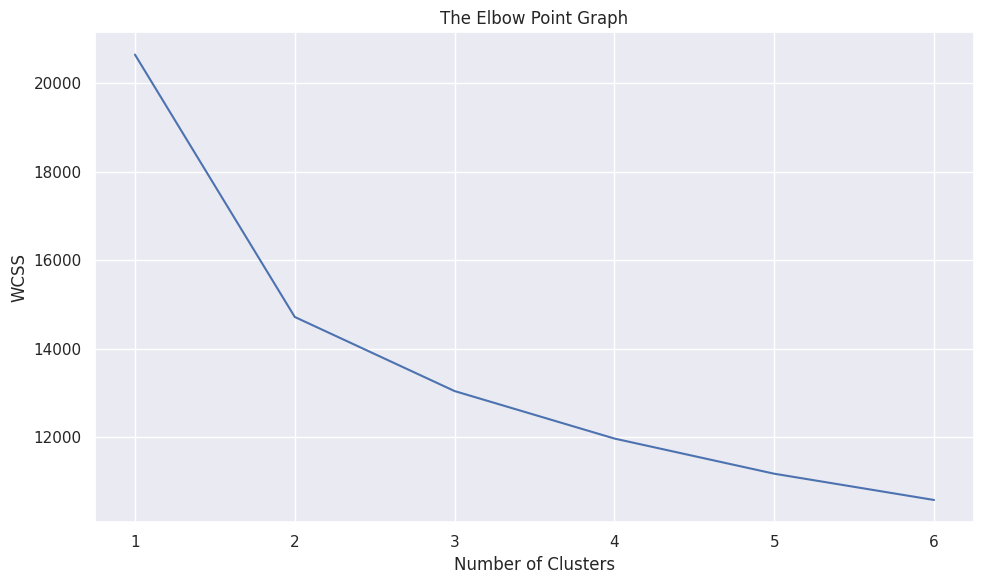

In [40]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,7):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(dataset_prepared)
    wcss.append(kmeans.inertia_)
    # intertia is the Sum of squared distances of samples to their closest cluster center (WCSS)

f=plt.figure(figsize=(10,6))

plt.plot(range(1,7), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
f.tight_layout()
plt.show()

For this result, we use k-means with 3 clusters.

In [41]:
#model
kmeans = KMeans(n_clusters=3, init='k-means++',random_state=0)
kmeans.fit(dataset_prepared)
labels = kmeans.labels_


#We insert the clusters into another dataset created
Dataset2 = Dataset.copy()
Dataset2['clusters'] = kmeans.fit_predict(dataset_prepared)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Now that we've segmented the customers, we can find the pattern for each customer group.

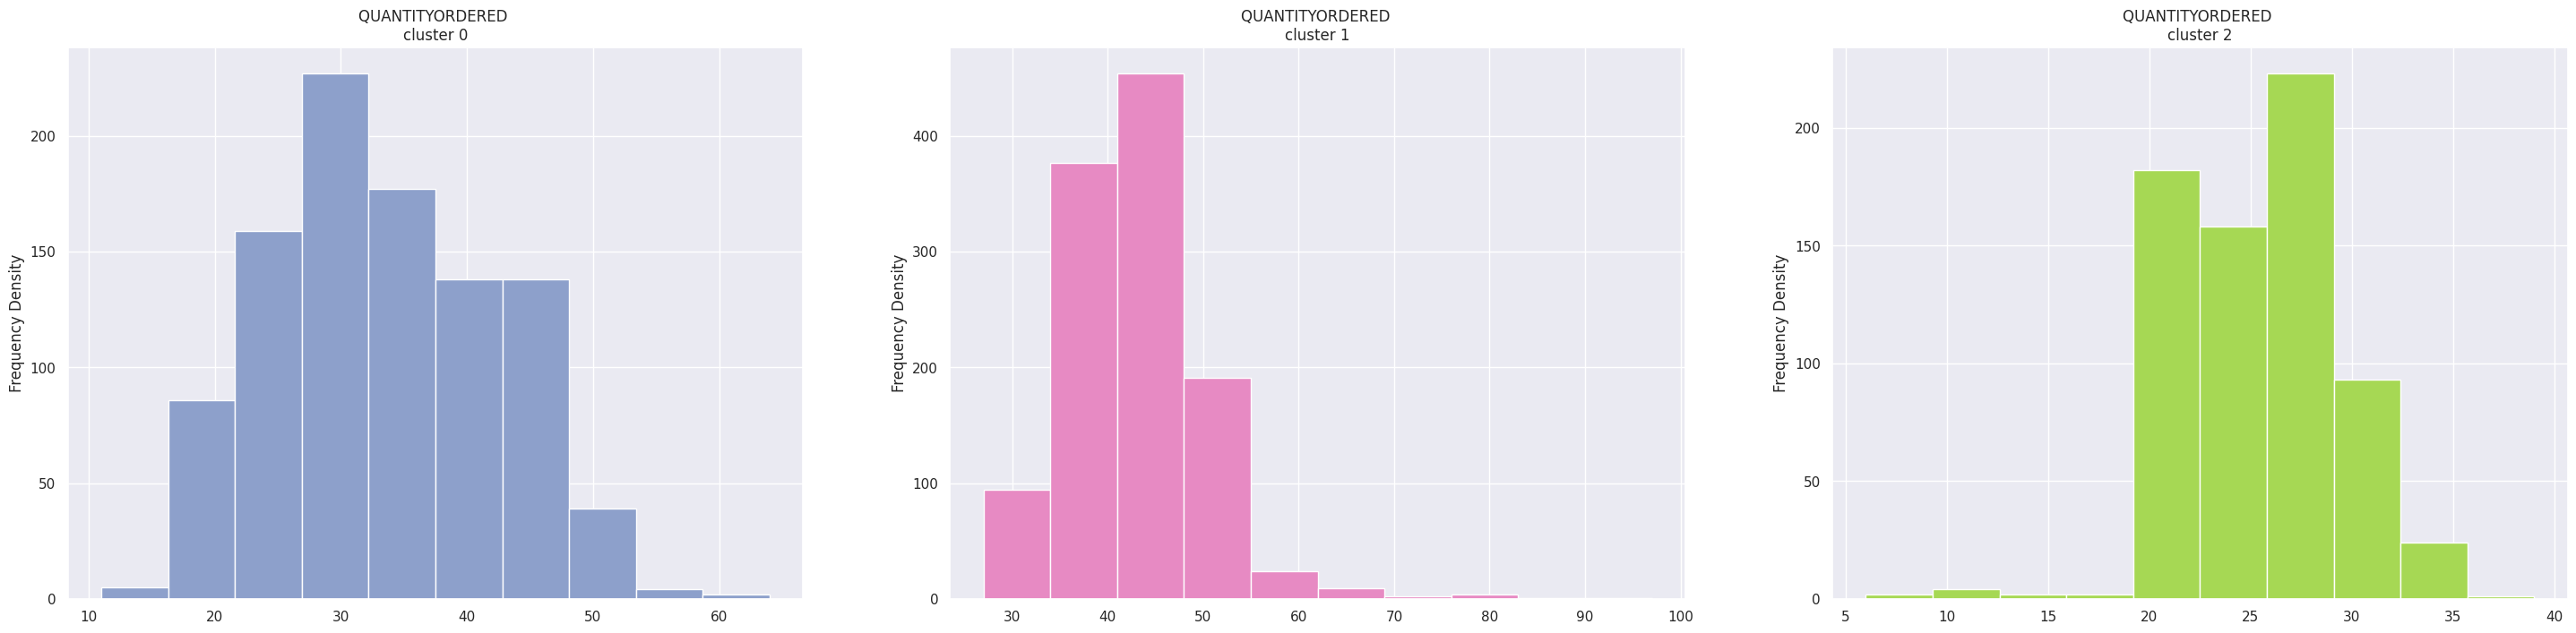

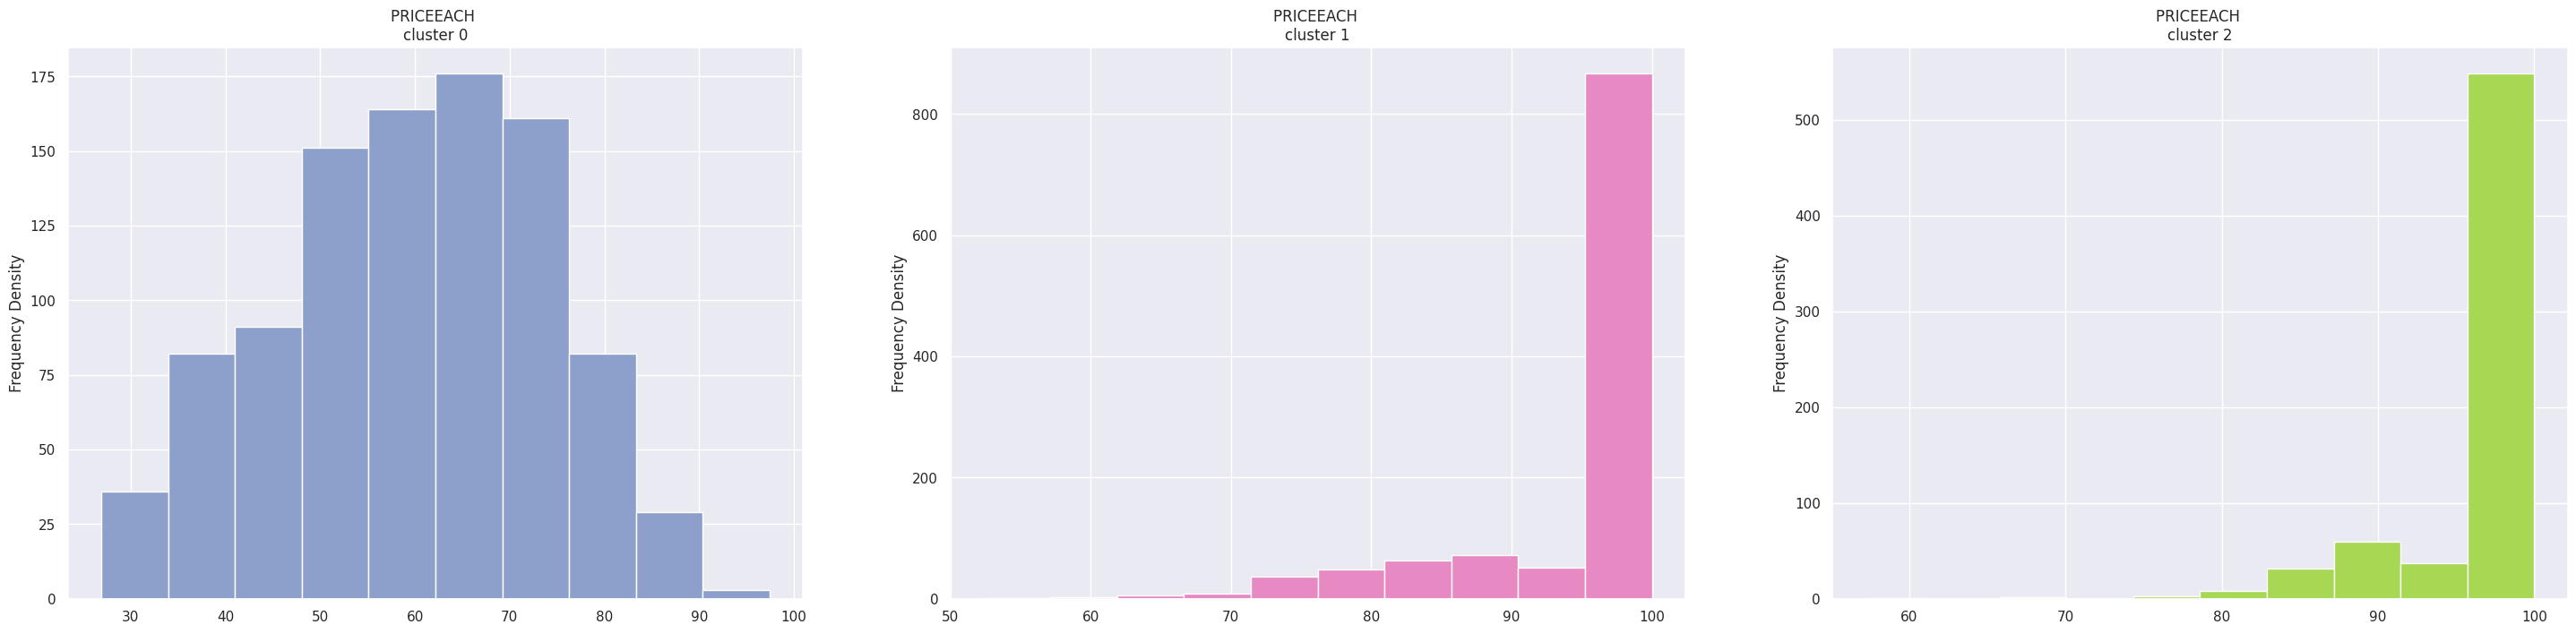

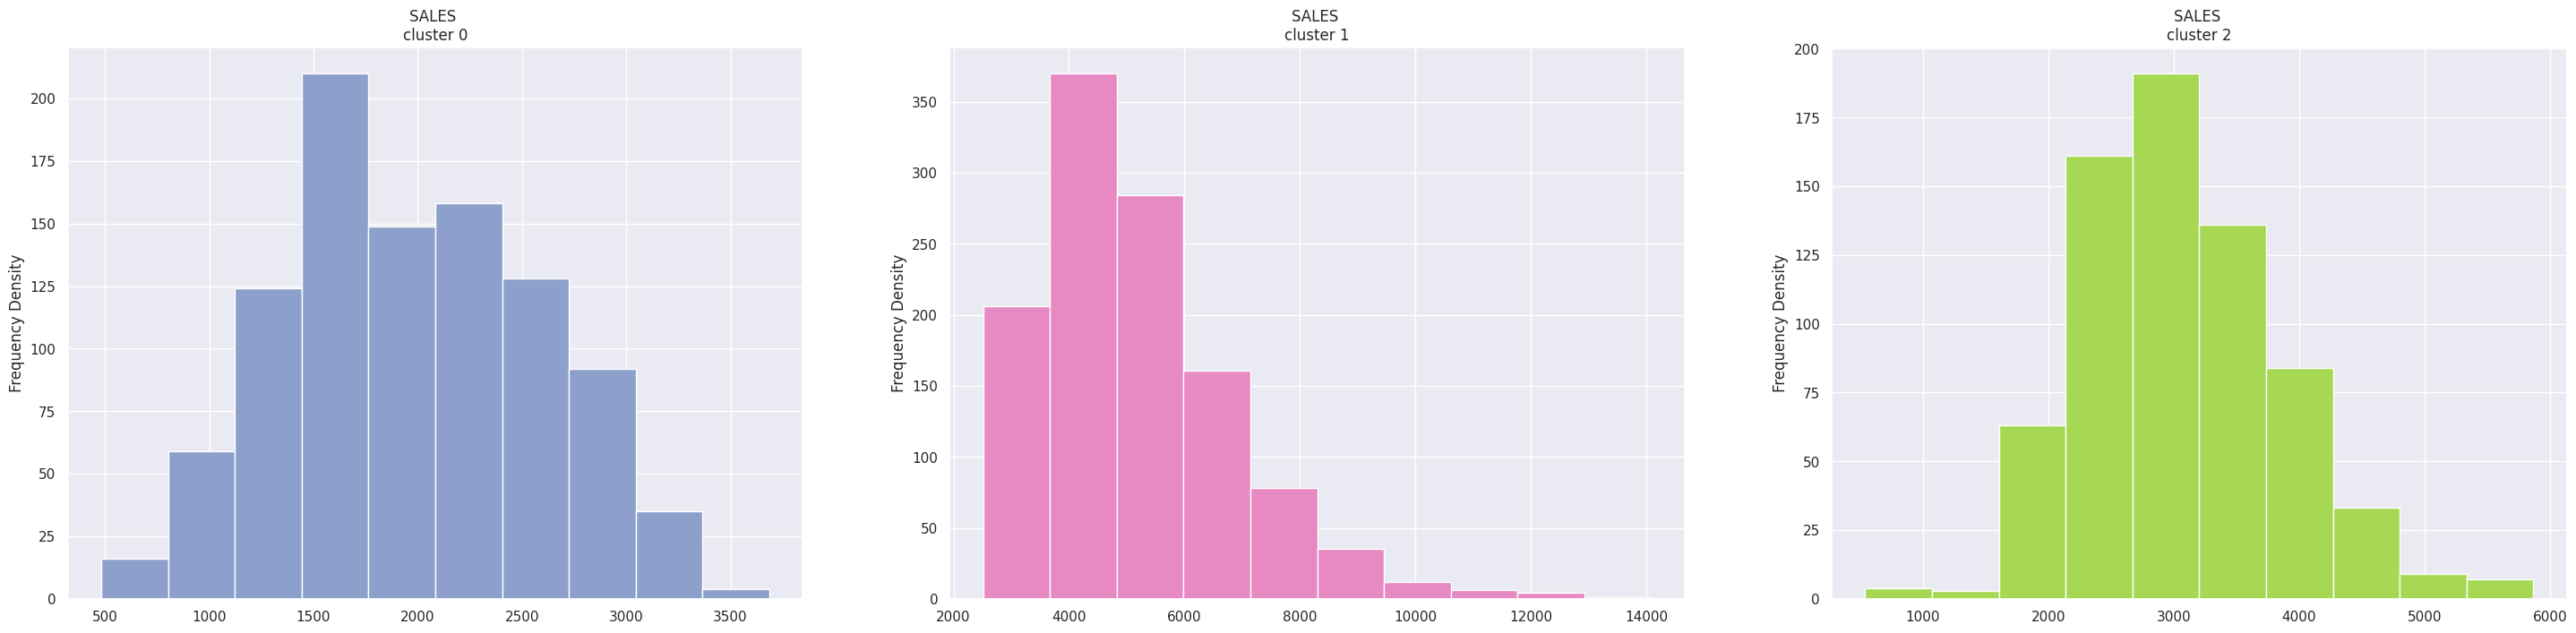

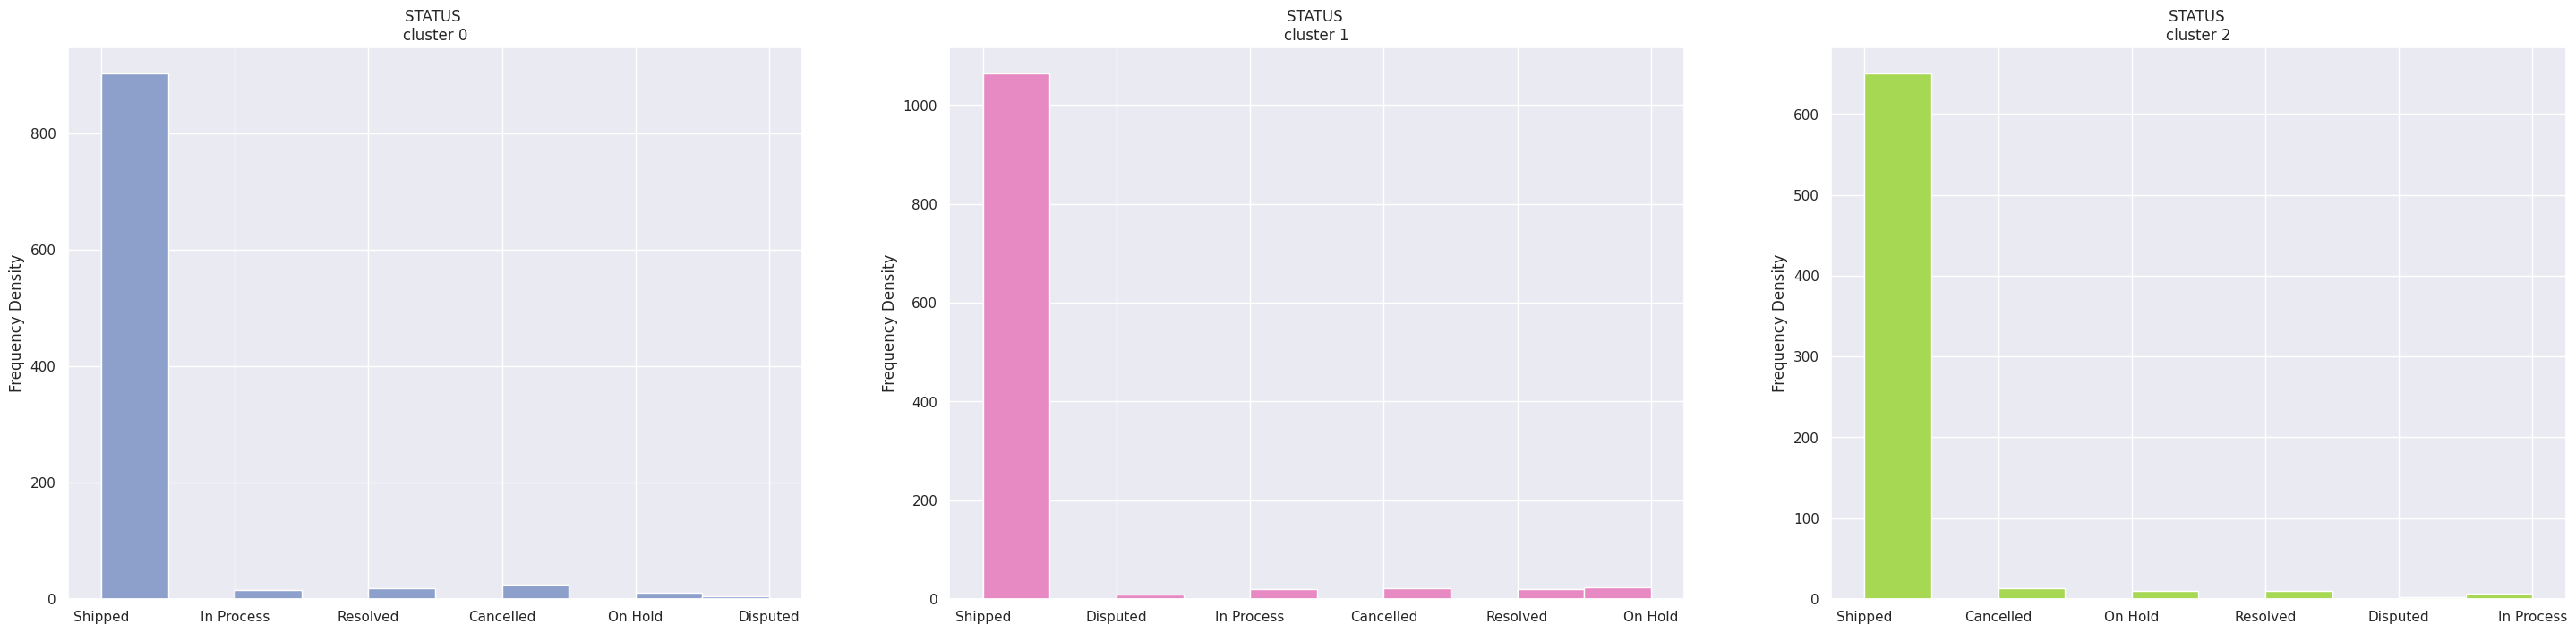

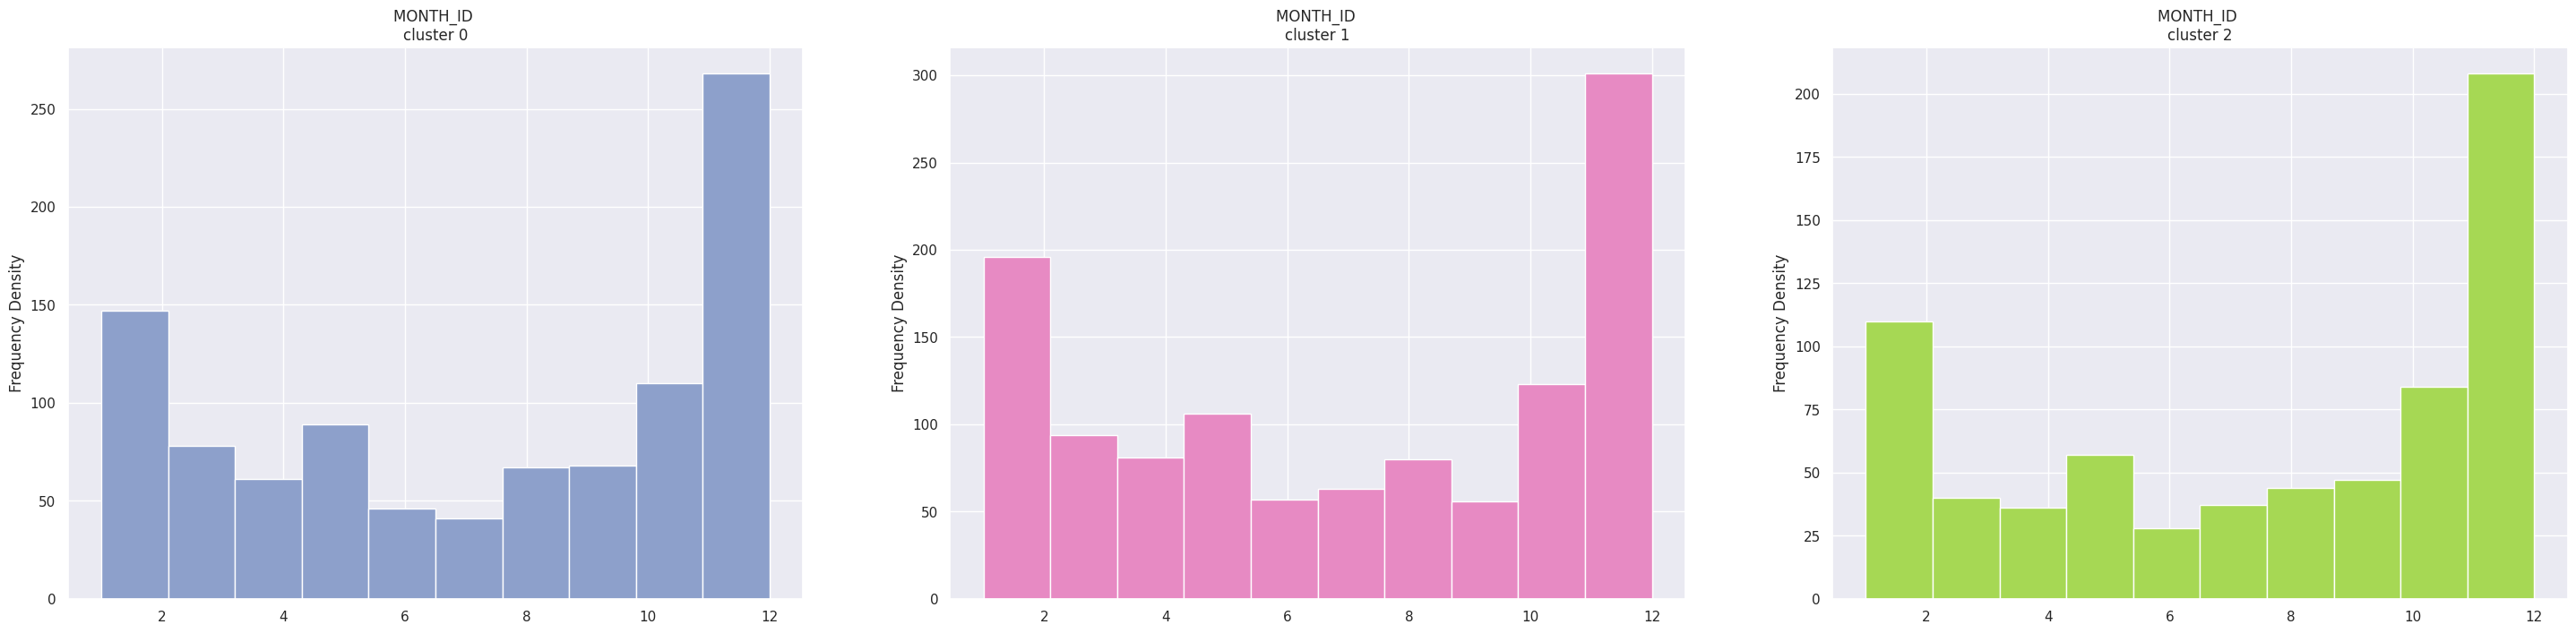

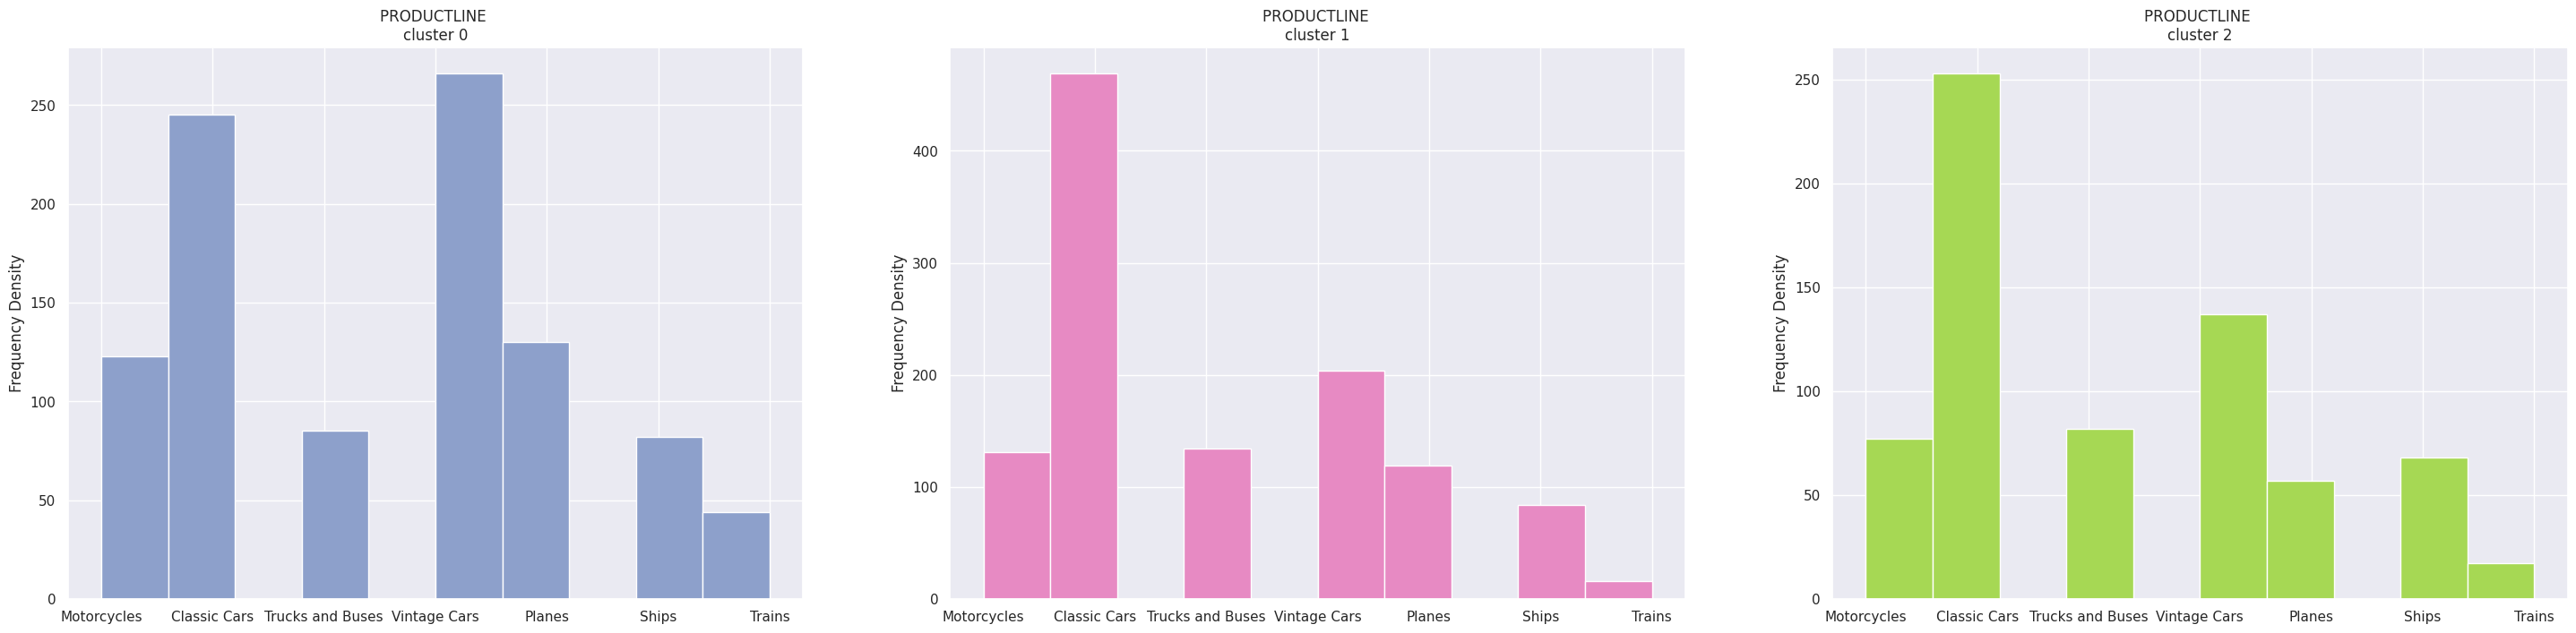

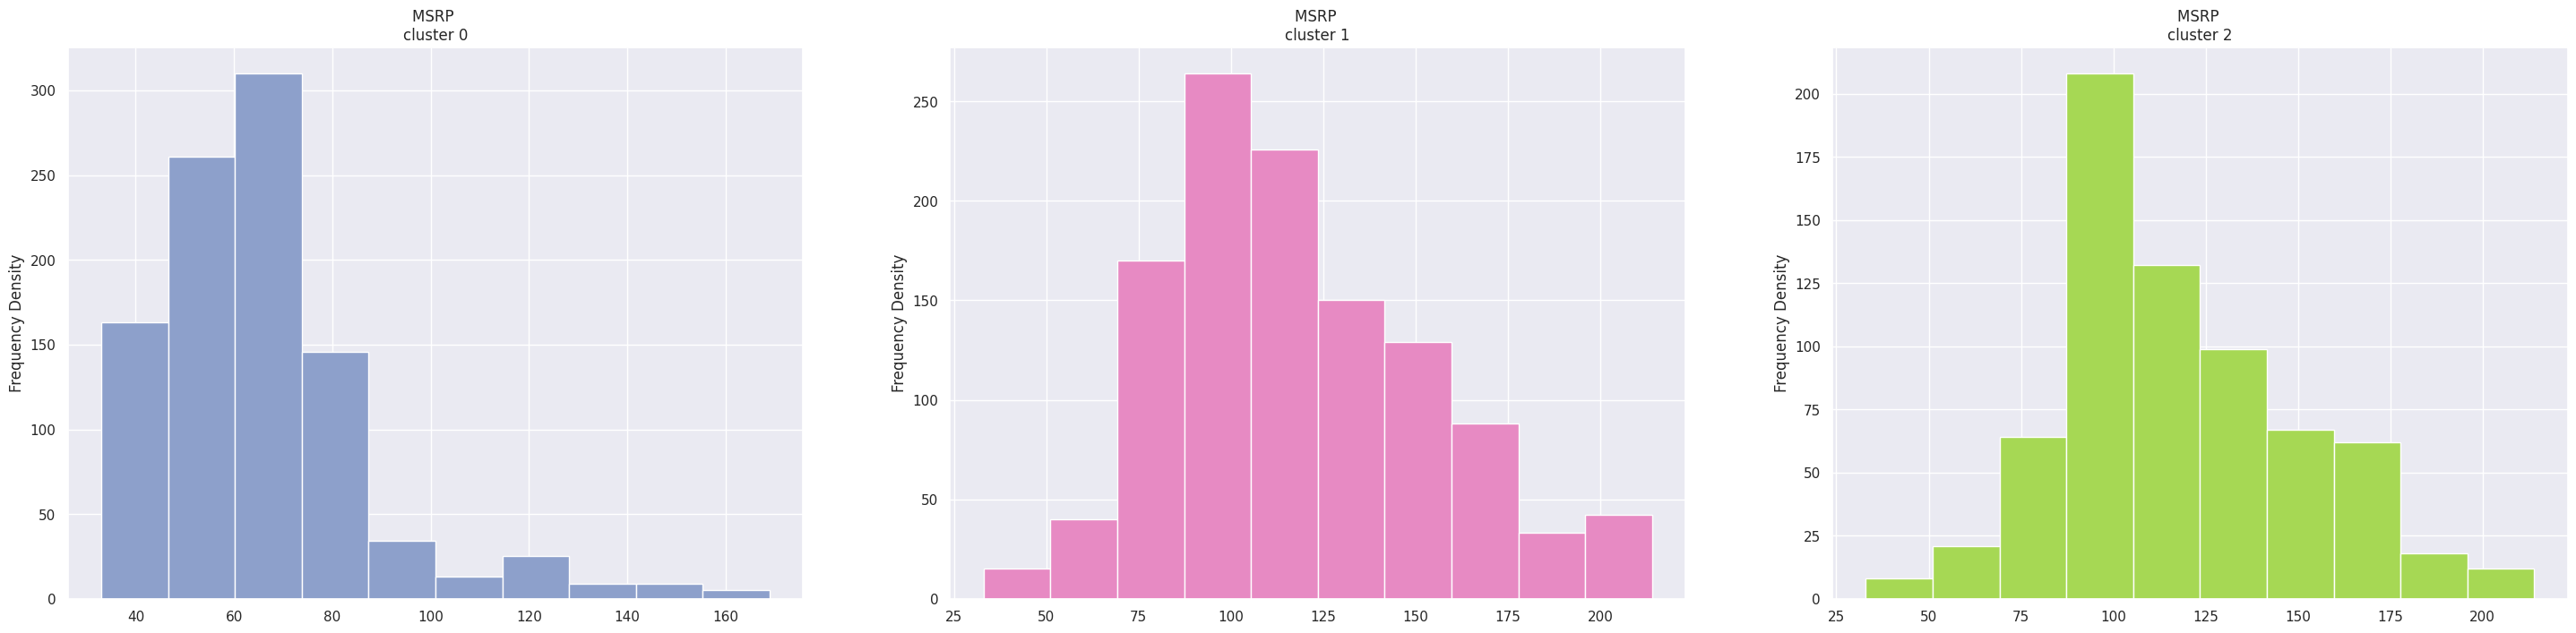

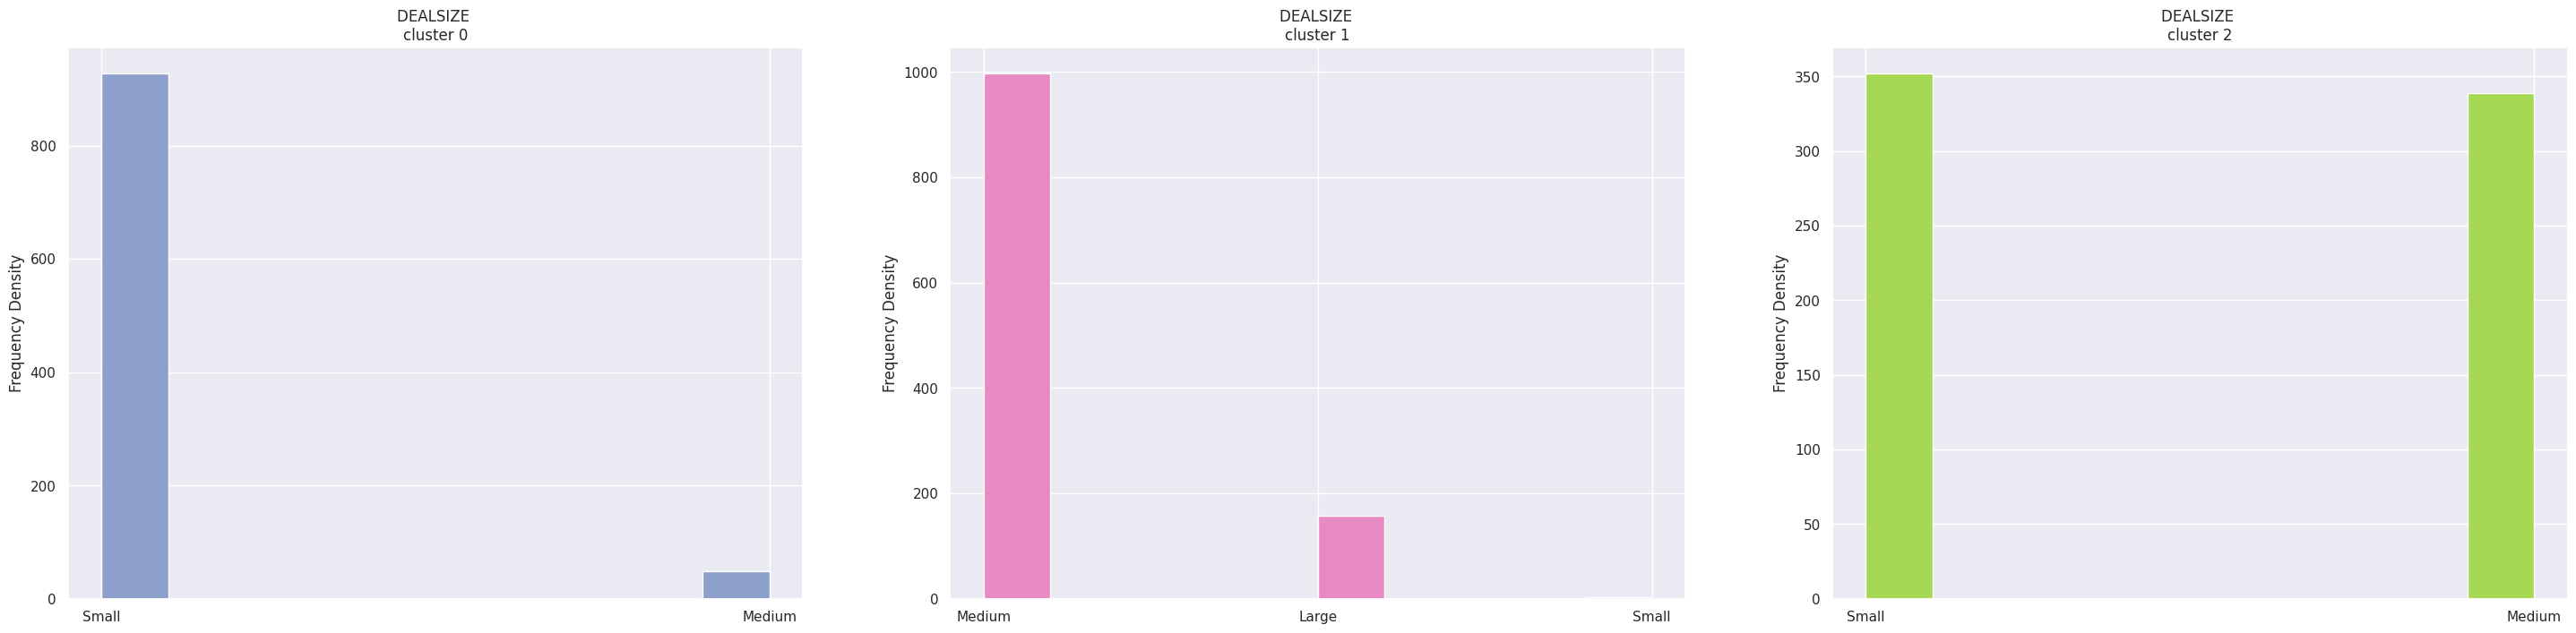

In [42]:
Dataset3 = Dataset2.drop('COUNTRY',axis=1).copy()#we removed a column difficult to paint

#color map for plotting
cmap1 = mpl.cm.Set2

# plot histogram for each feature based on cluster
for i in Dataset3.columns[:8]:
    plt.figure(figsize=(36,8))
    for j in range(3):
        plt.subplot(1,3,j+1)
        cluster = Dataset3[Dataset3['clusters']==j]
        cluster[i].hist(color=cmap1(j + 2))
        plt.ylabel('Frequency Density')
        plt.title('{} \ncluster {}'.format(i,j))
plt.show()



1.   Cluster (0): In this group the quantity of goods ordered is about 27.5, the price of each good purchased is approximately 100 dollars.In addition, total purchases are approximately 3000 dollars, the largest purchases occur in December and the most consumed product line is classic cars, and the agreements with these individuals are medium to small.;

2.   Cluster (1): In the current group, the quantity of goods ordered is about 45, purchases more products in the range of 100 dollars, as well as having total purchases of about 4000 dollars. Their purchases occur more frequently in December and the most consumed product line is classic cars.The agreements with this group are medium-sized;

3. Cluster (2): In this group, the amount of merchandise ordered is about 30, buys more products in the range of 65 dollars, as well as having total purchases of about 1600 dollars. This group buys more in December and the most purchased product line is vintage cars. Agreements with this group are small.



### 5.5 - Viewing the clusters

As you can imagine our model has a high dimension, so how can we visualize a 12 dimensional graph?????? To solve this problem we will use a dimensionality reduction through the PCA (Principal Component Analysis) altorhythm. PCA rotates a data cloud in such a way that the rotated features are not statistically correlated. The features are rotated in the direction of greater variance that we call principal components, as they become the first dimension, something similar occurs until the desired dimension.


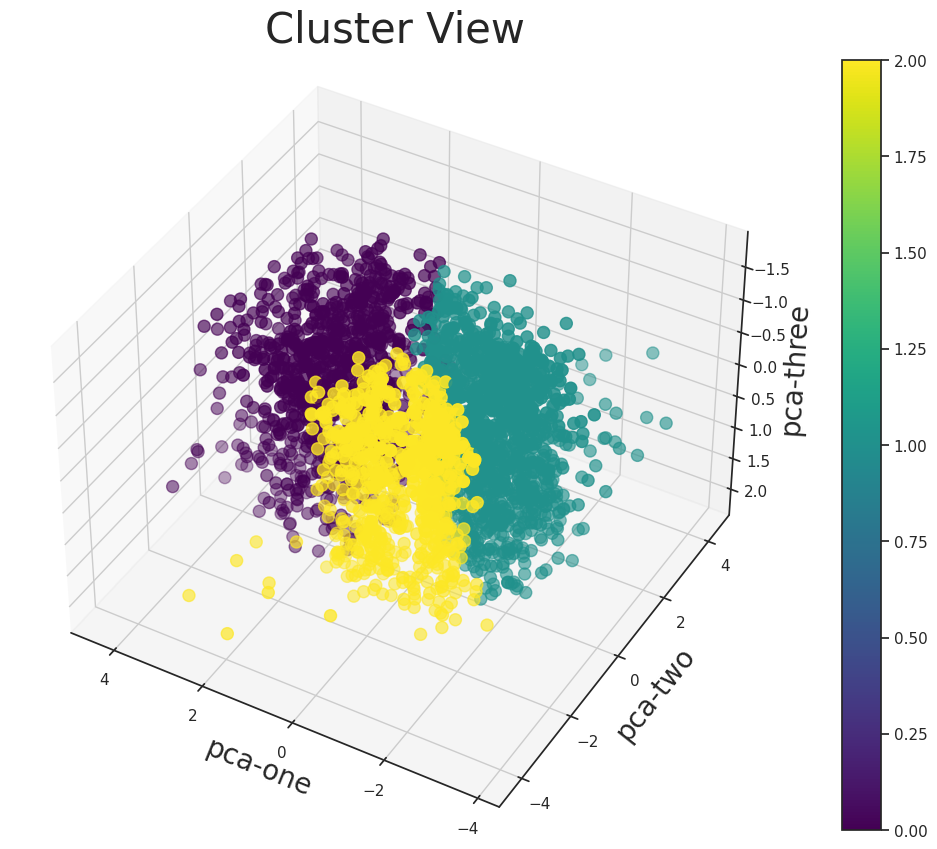

In [43]:
from sklearn.decomposition import PCA
from matplotlib import colorbar


sns.set_theme(style="white")

#choose the dimension
pca = PCA(n_components=3)
principal_comp = pca.fit_transform(dataset_prepared)#fit the model on the data

#create a dictionary with all the information we want to plot
thisdict = {
  "pca1": principal_comp[:,0],
  "pca2": principal_comp[:,1],
  "pca3": principal_comp[:,2],
  'cluster': labels
}

#we create the dataframe from the dictionary
pca_df = pd.DataFrame(thisdict)

#set the fig size and take the figure
fig = plt.figure(figsize=(16,10))

#set a 3d plot on the axes
ax = fig.add_subplot(111, projection='3d')

#plot
p = ax.scatter(
    xs=pca_df['pca1'], ys=pca_df['pca2'], zs=pca_df['pca3'],
    c=labels,s=75,
    cmap='viridis'
)

#labels ans titles
ax.set_xlabel('pca-one',fontsize = 20)
ax.set_ylabel('pca-two',fontsize = 20)
ax.set_zlabel('pca-three',fontsize = 20)
ax.view_init(-140, 60)

plt.title('Cluster View',fontsize = 30,x=0.5, y=1.1)

#side color bar
fig.colorbar(p, ax=ax)

plt.show()


## 6 - To Deploy

Now let's save the model, to deploy it later.

In [44]:
import pickle

### 6.1 - Final Pipeline

we do the final pipeline

In [45]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("kmeans", KMeans(n_clusters=3, init='k-means++',random_state=0))
    ])

full_pipeline_with_predictor.fit(Dataset)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('PowerTransformer',
                                                                   PowerTransformer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['QUANTITYORDERED',
                                                   'PRICEEACH', 'SALES',
                                                   'MONTH_ID', 'MSRP']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['STATUS', 'PRODUCTLINE',
                                                   'COUNTRY', 'DEALSIZE'])])),
                ('kmeans', KMeans(n_clusters=3, random_state=0))])

### 6.2 - Saving the trained model

We use a dump method, which takes the clf model as an input and writes our classifier in binary to the file "wb".

In [46]:
model = full_pipeline_with_predictor


filename = 'trained_model.sav'
pickle.dump(model, open(filename, 'wb'))

test the model

In [47]:
loadModel = pickle.load(open(filename, 'rb'))

# return a label for each data point based on their cluster
Y = loadModel.predict(Dataset)

print(Y)

[2 0 1 ... 1 0 0]


In [48]:
!pip install streamlit -q

In [49]:
!wget -q -O - ipv4.icanhazip.com

34.139.182.171


In [50]:
! streamlit run main.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.139.182.171:8501

your url is: https://petite-chairs-kick.loca.lt
  Stopping...
^C
